# Project 02
## Problem 1
Given the dataset in DailyPrices.csv, for the stocks SPY, AAPL, and EQIX

A. Calculate the Arithmetic Returns. Remove the mean, such that each series has 0 mean. Present the last 5 rows and the total standard deviation.

B. Calculate the Log Returns. Remove the mean, such that each series has 0 mean. Present the last 5 rows and the total standard deviation.


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
dailyPrices = pd.read_csv("../Projects/Project02/DailyPrices.csv", index_col='Date', parse_dates=True)
print(dailyPrices.tail())
# dailyPrices['Date'] = pd.to_datetime(dailyPrices['Date'])

# # 设置日期列为索引
# dailyPrices.set_index('Date', inplace=True)

                   SPY        AAPL        NVDA        MSFT        AMZN  \
Date                                                                     
2024-12-27  595.010010  255.589996  137.009995  430.529999  223.750000   
2024-12-30  588.219971  252.199997  137.490005  424.829987  221.300003   
2024-12-31  586.080017  250.419998  134.289993  421.500000  219.389999   
2025-01-02  584.640015  243.850006  138.309998  418.579987  220.220001   
2025-01-03  591.950012  243.360001  144.470001  423.350006  224.190002   

                  META       GOOGL        AVGO        TSLA        GOOG  ...  \
Date                                                                    ...   
2024-12-27  599.809998  192.759995  241.750000  431.660004  194.039993  ...   
2024-12-30  591.239990  191.240005  235.580002  417.410004  192.690002  ...   
2024-12-31  585.510010  189.300003  231.839996  403.839996  190.440002  ...   
2025-01-02  599.239990  189.429993  231.979996  379.279999  190.630005  ...   
2025-01

In [156]:
stocks_p1 = ["SPY", "AAPL", "EQIX"]
data1 = dailyPrices[stocks_p1]
# A. Arithmetic Returns
arithmetic_returns = data1.pct_change().dropna()
arithmetic_returns_zero_mean = arithmetic_returns - arithmetic_returns.mean()

# B. Log Returns
log_returns = np.log(data1 / data1.shift(1)).dropna()
log_returns_zero_mean = log_returns - log_returns.mean()

# Present the last 5 rows and the total standard deviation
print("Arithmetic Returns (Last 5 Rows):")
print(arithmetic_returns_zero_mean.tail())
print("\nArithmetic Returns Standard Deviation:")
print(arithmetic_returns_zero_mean.std())

print("\nLog Returns (Last 5 Rows):")
print(log_returns_zero_mean.tail())
print("\nLog Returns Standard Deviation:")
print(log_returns_zero_mean.std())

Arithmetic Returns (Last 5 Rows):
                 SPY      AAPL      EQIX
Date                                    
2024-12-27 -0.011492 -0.014678 -0.006966
2024-12-30 -0.012377 -0.014699 -0.008064
2024-12-31 -0.004603 -0.008493  0.006512
2025-01-02 -0.003422 -0.027671  0.000497
2025-01-03  0.011538 -0.003445  0.015745

Arithmetic Returns Standard Deviation:
SPY     0.008077
AAPL    0.013483
EQIX    0.015361
dtype: float64

Log Returns (Last 5 Rows):
                 SPY      AAPL      EQIX
Date                                    
2024-12-27 -0.011515 -0.014675 -0.006867
2024-12-30 -0.012410 -0.014696 -0.007972
2024-12-31 -0.004577 -0.008427  0.006602
2025-01-02 -0.003392 -0.027930  0.000613
2025-01-03  0.011494 -0.003356  0.015725

Log Returns Standard Deviation:
SPY     0.008078
AAPL    0.013446
EQIX    0.015270
dtype: float64


### Problem 2
Given the dataset in DailyPrices.csv, you have a portfolio of:

    ● 100 shares of SPY

    ● 200 shares of AAPL

    ● 150 shares of EQIX

A. Calculate the current value of the portfolio given today is 1/3/2025

B. Calculate the VaR and ES of each stock and the entire portfolio at the 5% alpha level assuming arithmetic returns and 0 mean return, for the following methods:

    a. Normally distributed with exponentially weighted covariance with lambda=0.97
    b. T distribution using a Gaussian Copula
    c. Historic simulation using the full history.

C. Discuss the differences between the methods.


In [157]:
## PART A
dailyPrices = data1
stocks_p2 = ["SPY", "AAPL", "EQIX"]
data2= dailyPrices[stocks_p2]
portfolio = {'SPY': 100, 'AAPL': 200, 'EQIX': 150}
portfolio_values = np.array(list(portfolio.values()))
today = pd.to_datetime('1/3/2025')
prices_today = data2.loc[today]

portfolio_value = sum(prices_today[stock] * shares for stock, shares in portfolio.items())
print(f"Portfolio Value on 1/3/2025: ${portfolio_value:.2f}")

Portfolio Value on 1/3/2025: $251862.50


In [158]:
# 计算每只股票当前的市值
portfolio_market_value = prices_today * portfolio_values
# print(portfolio_market_value)

# 计算每只股票的投资组合权重
weights = portfolio_market_value / portfolio_value
weights = weights.values.reshape(-1, 1)  # 转换为列向量

# Calculate arithmetic returns
returns = data2.pct_change().dropna()

In [159]:
# from scipy.stats import kurtosis, skew
#
# # 检查收益分布的峰度和偏度
# for stock in returns.columns:
#     print(f"{stock} - Kurtosis: {kurtosis(returns[stock]):.4f}, Skewness: {skew(returns[stock]):.4f}")

In [160]:
## PART 2
## Method A: Normally distributed with exponentially weighted covariance with lambda=0.97
from scipy.stats import norm, t, multivariate_normal

def exponential_weighted_covariance(returns, lambda_=0.97):
    weights = np.array([lambda_**i for i in range(len(returns))][::-1])
    weights /= weights.sum()
    weighted_returns = returns.subtract(returns.mean(), axis=1)
    cov = np.cov(weighted_returns.T, aweights=weights)
    return cov

def normal_VaR_and_ES(returns, weights, portfolio_value, lambda_=0.97, alpha=0.05):
    cov = exponential_weighted_covariance(returns, lambda_)
    portfolio_variance = weights.T @ cov @ weights
    portfolio_std = np.sqrt(portfolio_variance).item()

    z_alpha = norm.ppf(alpha)
    var_delta_normal = -z_alpha * portfolio_std * portfolio_value
    es_delta_normal = (norm.pdf(z_alpha) / alpha) * portfolio_std * portfolio_value

    # Individual stock VaR and ES calculations
    individual_vars = []
    individual_es = []

    for i in range(len(weights)):
        # Extract the variance for this stock
        stock_variance = cov[i, i]
        stock_std = np.sqrt(stock_variance)
        stock_value = weights[i] * portfolio_value

        # Calculate individual VaR and ES
        stock_var = -z_alpha * stock_std * stock_value
        stock_es = (norm.pdf(z_alpha) / alpha) * stock_std * stock_value

        individual_vars.append(stock_var.item())
        individual_es.append(stock_es.item())

    return var_delta_normal, es_delta_normal, individual_vars, individual_es

# Calculate VaR and ES for portfolio and individual stocks
var_delta_normal, es_delta_normal, individual_vars, individual_es = normal_VaR_and_ES(returns, weights, portfolio_value)

# Print portfolio results
print(f"Portfolio VaR (Delta-Normal, 5%): ${var_delta_normal:.2f}")
print(f"Portfolio ES (Delta-Normal, 5%): ${es_delta_normal:.2f}")

# Print individual stock results
print("\nIndividual Stocks:")
for i, stock in enumerate(stocks_p2):
    print(f"  VaR (5%) for {stock}: ${individual_vars[i]:.2f}")
    print(f"  ES (5%) for {stock}: ${individual_es[i]:.2f}")

Portfolio VaR (Delta-Normal, 5%): $3886.02
Portfolio ES (Delta-Normal, 5%): $4873.23

Individual Stocks:
  VaR (5%) for SPY: $832.16
  ES (5%) for SPY: $1043.57
  VaR (5%) for AAPL: $952.06
  ES (5%) for AAPL: $1193.92
  VaR (5%) for EQIX: $2953.92
  ES (5%) for EQIX: $3704.34


In [161]:
## PART 2
## Method B
def t_dist_gaussian_copula(returns, weights, portfolio_value, alpha=0.05, n_simulations=10000):
    # Force zero mean if required
    zero_mean_returns = returns - returns.mean()

    # Fit t distribution to each asset
    params = {}
    for stock in stocks_p2:
        params[stock] = t.fit(zero_mean_returns[stock])

    # Convert to uniform using the fitted t-distribution
    uniform_data = pd.DataFrame(index=zero_mean_returns.index, columns=zero_mean_returns.columns)
    for stock in stocks_p2:
        df, loc, scale = params[stock]
        uniform_data[stock] = t.cdf(zero_mean_returns[stock], df, loc, scale)

    # Convert to normal using inverse normal CDF
    normal_data = uniform_data.apply(lambda x: norm.ppf(x))

    # Calculate correlation matrix (using Pearson correlation)
    corr_matrix = normal_data.corr().values

    # Generate correlated normal random variables
    np.random.seed(42)
    Z = np.random.multivariate_normal(mean=np.zeros(len(stocks_p2)), cov=corr_matrix, size=n_simulations)

    # Convert back to uniform
    U = norm.cdf(Z)

    # Convert back to original distribution using t inverse CDF
    simulated_returns = np.zeros_like(U)
    for i, stock in enumerate(stocks_p2):
        df, loc, scale = params[stock]
        simulated_returns[:, i] = t.ppf(U[:, i], df, loc, scale)

    # Calculate portfolio returns
    portfolio_returns = simulated_returns @ weights

    # Calculate VaR and ES
    portfolio_returns = portfolio_returns.flatten()  # Flatten first
    portfolio_returns.sort()  # Then sort
    var_index = int(alpha * n_simulations)
    var_t_copula = -portfolio_returns[var_index] * portfolio_value
    es_t_copula = -np.mean(portfolio_returns[:var_index]) * portfolio_value

    return var_t_copula, es_t_copula

var_t_copula, es_t_copula = t_dist_gaussian_copula(returns, weights, portfolio_value)

print(f"VaR (T-distribution with Gaussian Copula, 5%): ${var_t_copula:.2f}")
print(f"ES (T-distribution with Gaussian Copula, 5%): ${es_t_copula:.2f}")

def individual_t_dist_var_es(returns, weights, portfolio, portfolio_value, alpha=0.05, n_simulations=10000):
    var_results = {}
    es_results = {}

    # Zero mean returns
    zero_mean_returns = returns - returns.mean()

    for i, stock in enumerate(portfolio.keys()):
        # print(i, stock)
        # Fit t distribution to the stock
        params = t.fit(zero_mean_returns[stock])
        df, loc, scale = params

        # Generate simulated returns from t-distribution
        np.random.seed(42)
        simulated_returns = t.rvs(df, loc, scale, size=n_simulations)

        # Calculate dollar returns
        dollar_returns = simulated_returns * weights[i] * portfolio_value
        # Sort for VaR and ES calculation
        dollar_returns.sort()

        # Calculate VaR and ES
        var_index = int(alpha * n_simulations)
        var_t = -dollar_returns[var_index]
        es_t = -np.mean(dollar_returns[:var_index])

        var_results[stock] = var_t
        es_results[stock] = es_t

    return var_results, es_results

individual_var_t, individual_es_t = individual_t_dist_var_es(returns, weights, portfolio, portfolio_value)
# Print individual stock results
print("\nIndividual Stocks:")
print("VaR (T-distribution with Gaussian Copula, 5%):", individual_var_t)
print("ES (T-distribution with Gaussian Copula, 5%):", individual_es_t)

VaR (T-distribution with Gaussian Copula, 5%): $4460.94
ES (T-distribution with Gaussian Copula, 5%): $6102.83

Individual Stocks:
VaR (T-distribution with Gaussian Copula, 5%): {'SPY': np.float64(765.8586813582463), 'AAPL': np.float64(1032.3262229517113), 'EQIX': np.float64(3436.298646009848)}
ES (T-distribution with Gaussian Copula, 5%): {'SPY': np.float64(1025.4728006790565), 'AAPL': np.float64(1459.9167861312446), 'EQIX': np.float64(4884.366944391886)}


In [162]:
## PART 2
## Method C
position_values = {stock: portfolio[stock] * prices_today[stock] for stock in portfolio.keys()}
historical_dollar_changes = pd.DataFrame()
arithmetic_returns_zero_mean = returns - returns.mean()
for stock in portfolio:
    historical_dollar_changes[stock] = arithmetic_returns_zero_mean[stock] * position_values[stock]

# Calculate portfolio P&L
portfolio_pnl = historical_dollar_changes.sum(axis=1)

# Calculate VaR and ES
var_historical = np.percentile(portfolio_pnl, 5)
es_historical = portfolio_pnl[portfolio_pnl <= var_historical].mean()
print(f"VaR (Historical, 5%): ${-var_historical:.2f}")
print(f"ES (Historical, 5%): ${-es_historical:.2f}")

## Method C: Historical Simulation for individual stocks
def individual_historical_var_es(returns, position_values, alpha=0.05):
    var_results = {}
    es_results = {}

    # Already have zero_mean_returns from your code
    arithmetic_returns_zero_mean = returns - returns.mean()

    for stock in position_values.keys():
        # Calculate historical dollar changes
        historical_dollar_changes_stock = arithmetic_returns_zero_mean[stock] * position_values[stock]

        # Calculate VaR and ES
        var_historical = np.percentile(historical_dollar_changes_stock, alpha * 100)
        es_historical = historical_dollar_changes_stock[historical_dollar_changes_stock <= var_historical].mean()

        var_results[stock] = -var_historical
        es_results[stock] = -es_historical

    return var_results, es_results

individual_var_hist, individual_es_hist = individual_historical_var_es(returns, position_values)
# Print individual stock results
print("\nIndividual Stocks:")
print("VaR (Historical, 5%):", individual_var_hist)
print("ES (Historical, 5%):", individual_es_hist)


VaR (Historical, 5%): $4575.03
ES (Historical, 5%): $6059.39

Individual Stocks:
VaR (Historical, 5%): {'SPY': np.float64(872.4038627047056), 'AAPL': np.float64(1067.1149556453588), 'EQIX': np.float64(3635.0770911278046)}
ES (Historical, 5%): {'SPY': np.float64(1080.1042035242676), 'AAPL': np.float64(1437.7852719672164), 'EQIX': np.float64(4714.893996144099)}


## PART 3
The three methods—Delta-Normal VaR, T-distribution with Gaussian Copula, and Historical The three Value at Risk (VaR) and Expected Shortfall (ES) estimation methods produce different results due to their underlying assumptions and methodologies. The Delta-Normal method, which assumes normally distributed returns and uses an exponentially weighted covariance matrix with λ = 0.97, resulted in a VaR of 3,886.02 and an ES of 4,873.23. This is the lowest among the three methods, which suggests that assuming normality underestimates tail risk. In contrast, the T-distribution with Gaussian Copula method, which captures non-normal dependencies between assets, resulted in a VaR of 4,460.94 and an ES of 6,102.83. This indicates a higher risk estimate due to the ability of the t-copula to model fat tails and extreme co-movements. Finally, the Historical Simulation method, which directly uses past return data without distributional assumptions, produced the highest VaR of 4,575.03 and an ES of 6,059.39. This suggests that historical data contains more extreme losses than those predicted by the normal assumption. The results show that the normality assumption tends to underestimate potential losses, while the historical and t-copula methods provide more conservative risk estimates. Among them, the historical method gives the highest VaR, suggesting that past extreme events had significant impacts on risk estimation, while the t-copula method also captures fat tails effectively.

## Problem 3
You have a European Call option with the following parameters

● Time to maturity: 3 months (0.25 years)

● Stock Price: $31

● Call Price: $3.00

● Strike Price: $30

● Risk Free Rate: 10%

● No dividends are paid.



A. Calculate the implied volatility

In [163]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq

# Given parameters
S0 = 31       # Stock price
K = 30       # Strike price
T = 0.25     # Time to maturity in years
r = 0.10     # Risk-free rate
C_market = 3.00  # Market call option price

# Black-Scholes formula for call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to find the difference between model price and market price
def objective_function(sigma):
    return black_scholes_call(S0, K, T, r, sigma) - C_market

# Solve for implied volatility using root-finding method
# Search between 0.01% and 100% volatility
try:
    implied_volatility = brentq(objective_function, 0.0001, 1.0)
    print(f"Implied Volatility: {implied_volatility:.4f} ({implied_volatility*100:.2f}%)")
except ValueError:
    print("Could not find implied volatility within the specified range.")

# # Verify the result
# call_price = black_scholes_call(S, K, T, r, implied_volatility)
# print(f"Call Price with Calculated IV: ${call_price:.4f}")

Implied Volatility: 0.3351 (33.51%)


B. Calculate the Delta, Vega, and Theta. Using this information, by approximately how much would the price of the option change is the implied volatility increased by 1%. Prove it.

In [164]:
# Calculate d1 and d2 for Black-Scholes
def calculate_d1_d2(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

d1, d2 = calculate_d1_d2(S0, K, T, r, implied_volatility)

# Calculate Delta
delta = norm.cdf(d1)
print(f"Delta: {delta}")

# Calculate Vega (sensitivity to volatility changes)
# Note: Vega is typically expressed as change per 1 percentage point change in volatility
vega = S0 * norm.pdf(d1) * np.sqrt(T) * 0.01  # 0.01 = 1 percentage point
print(f"Vega: {vega}")

# Calculate Theta
# Theta is typically expressed as change per calendar day
theta = -(S0 * norm.pdf(d1) * implied_volatility) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
print(f"Theta (annually): {theta}")

current_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
# Calculate option price with volatility increased by 1%
new_volatility = implied_volatility + 0.01  # Adding 1 percentage point (0.01 in decimal)
d1_new, d2_new = calculate_d1_d2(S0, K, T, r, new_volatility)
new_price = S0 * norm.cdf(d1_new) - K * np.exp(-r * T) * norm.cdf(d2_new)
print(f"Option price with volatility +1%: ${new_price}")

# Calculate actual price change
actual_change = new_price - current_price
print(f"Actual price change: ${actual_change}")

Delta: 0.6659296527386923
Vega: 0.05640705439230115
Theta (annually): -5.544561508358889
Option price with volatility +1%: $3.05649842751734
Actual price change: $0.056498427517343686


C. Calculate the price of the put using Generalized Black Scholes Merton. Does Put-Call Parity Hold?

In [165]:
def black_scholes(call: bool, S0, X, T, r, implied_vol):
    # Compute d1 and d2
    d1 = (np.log(S0 / X) + (r + 0.5 * implied_vol ** 2) * T) / (implied_vol * np.sqrt(T))
    d2 = d1 - implied_vol * np.sqrt(T)
    if call:
        option_price = S0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    else:
        option_price = X * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

    return option_price

In [166]:
put_price = black_scholes(False, S0, K, T, r, implied_volatility)
print(f"Put price: {put_price:.4f}")

Put price: 1.2593


In [167]:
LHS = C_market + K * np.exp(-r * T)
RHS = put_price + S0
print(f"LHS (C + K e^(-rT)): {LHS:.4f}")
print(f"RHS (P + S0): {RHS:.4f}")
if np.isclose(LHS, RHS, rtol=1e-4):
    print("Put-Call Parity holds.")
else:
    print("Put-Call Parity does not hold.")

LHS (C + K e^(-rT)): 32.2593
RHS (P + S0): 32.2593
Put-Call Parity holds.


D. Given a portfolio of

    a. 1 call

    b. 1 put

    c. 1 share of stock

Assuming the stock’s return is normally distributed with an annual volatility of 25%, the expected annual return of the stock is 0%, there are 255 trading days in a year, and the implied volatility is constant. Calculate VaR and ES for a 20 trading day holding period, at alpha=5%
using:

    d. Delta Normal Approximation

    e. Monte Carlo Simulation

Hint: Don’t forget to include the option value decay in your calculations


In [168]:
# Delta-Normal Approximation function
delta_portfolio = 0
def delta_normal_approximation(S0, K, T, r, sigma_annual, delta_call, vega_call, theta_call, holding_days, trading_days, alpha):
    # Convert holding period to years
    T_holding = holding_days / trading_days

    # Daily volatility
    sigma_daily = sigma_annual / np.sqrt(trading_days)

    # Put delta and theta
    delta_put = delta_call - 1  # derivative on S0 to the call-put parity formula
    theta_put = theta_call + r * K * np.exp(-r * T)  # derivative on t to the call-put parity formula

    # Portfolio Greeks
    global delta_portfolio
    delta_portfolio = delta_call + delta_put + 1  # Portfolio delta
    vega_portfolio = vega_call + vega_call        # Portfolio vega (call and put vegas are the same)
    theta_portfolio = theta_call + theta_put      # Portfolio theta

    # Portfolio value change parameters
    mean_delta_V = theta_portfolio * T_holding  # Mean change due to theta
    std_delta_V = delta_portfolio * S0 * sigma_daily * np.sqrt(holding_days)  # Standard deviation

    # Calculate VaR and ES
    z_alpha = norm.ppf(alpha)  # alpha quantile of standard normal distribution
    VaR_delta_normal = -(mean_delta_V + z_alpha * std_delta_V)

    # Expected Shortfall calculation
    phi_z_alpha = norm.pdf(z_alpha)  # Standard normal density at z_alpha
    ES_delta_normal = -mean_delta_V + (phi_z_alpha / alpha) * std_delta_V

    return VaR_delta_normal, ES_delta_normal

In [169]:
# Monte Carlo Simulation function
def monte_carlo_simulation(S0, K, T, r, sigma_annual, holding_days, trading_days, alpha, N=10000):
    # Convert holding period to years
    T_holding = holding_days / trading_days

    # Initial portfolio value
    initial_call = black_scholes(True, S0, K, T, r, sigma_annual)
    initial_put = black_scholes(False, S0, K, T, r, sigma_annual)
    initial_portfolio = initial_call + initial_put + S0

    # Simulate stock price paths
    np.random.seed(42)
    Z = np.random.normal(0, 1, N)  # Standard normal random variables

    # Simulate stock price at the end of the holding period using GBM
    S_t = S0 * np.exp((0 - 0.5 * sigma_annual**2) * T_holding + sigma_annual * np.sqrt(T_holding) * Z)

    # Calculate portfolio values for each simulated stock price
    portfolio_values = []
    remaining_T = T - T_holding  # Remaining time to maturity after holding period

    for S in S_t:
        # Call and put prices at the end of holding period
        call_t = black_scholes(True, S, K, remaining_T, r, sigma_annual)
        put_t = black_scholes(False, S, K, remaining_T, r, sigma_annual)
        portfolio_t = call_t + put_t + S  # Portfolio value
        portfolio_values.append(portfolio_t)

    # Calculate portfolio value changes
    portfolio_values = np.array(portfolio_values)
    portfolio_changes = portfolio_values - initial_portfolio

    # Calculate VaR and ES
    VaR = -np.percentile(portfolio_changes, alpha * 100)
    ES = -np.mean(portfolio_changes[portfolio_changes <= -VaR])

    return VaR, ES, portfolio_changes


In [170]:
# Given parameters
S0 = 31               # Stock price
K = 30                # Strike price K = X
T = 0.25              # Time to maturity (in years)
r = 0.10              # Risk-free rate
sigma_annual = 0.25   # Annual volatility
holding_days = 20     # Holding period in trading days
trading_days = 255    # Trading days in a year
alpha = 0.05          # Confidence level

# Option Greeks (from previous calculations)
delta_call = delta
vega_call = vega
theta_call = theta

# Calculate VaR and ES using Delta-Normal Approximation
VaR_delta_normal, ES_delta_normal = delta_normal_approximation(S0, K, T, r, sigma_annual, delta_call, vega_call, theta_call, holding_days, trading_days, alpha)

# Calculate VaR and ES using Monte Carlo Simulation
VaR_monte_carlo, ES_monte_carlo, portfolio_changes = monte_carlo_simulation(S0, K, T, r, sigma_annual, holding_days, trading_days, alpha)

# Output results
print("Delta-Normal Approximation:")
print(f"VaR (5%): {VaR_delta_normal:.4f}")
print(f"ES (5%): {ES_delta_normal:.4f}")

print("\nMonte Carlo Simulation:")
print(f"VaR (5%): {VaR_monte_carlo:.4f}")
print(f"ES (5%): {ES_monte_carlo:.4f}")

Delta-Normal Approximation:
VaR (5%): 5.3951
ES (5%): 6.6030

Monte Carlo Simulation:
VaR (5%): 3.9273
ES (5%): 4.2456


E. Discuss the differences between the 2 methods. Hint: graph the portfolio value vs the stock value and compare the assumptions between the 2 methods.

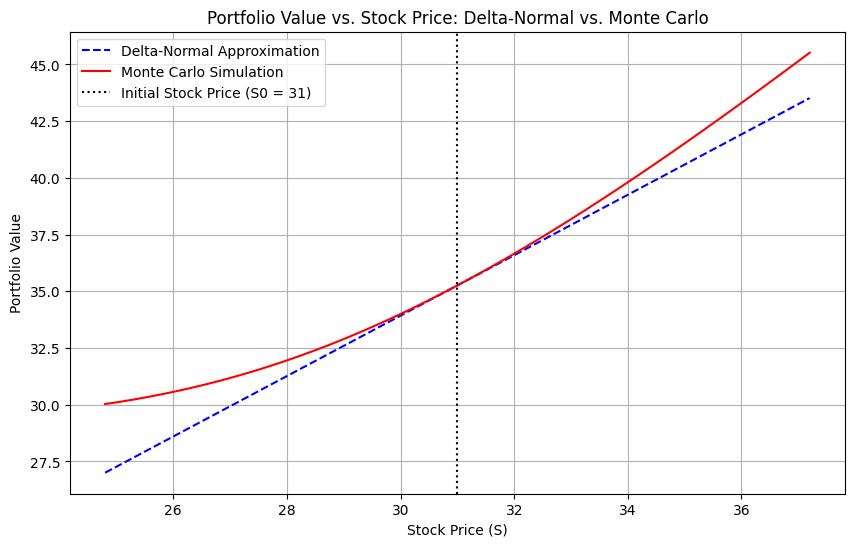

In [171]:
import matplotlib.pyplot as plt
# Portfolio value function
def portfolio_value(S, K, T, r, sigma):
    C = black_scholes(True, S, K, T, r, sigma)
    P = black_scholes(False, S, K, T, r, sigma)
    return C + P + S

# Delta-Normal Approximation: Linear relationship
def delta_normal_value(S, delta_portfolio, initial_portfolio_value):
    return initial_portfolio_value + delta_portfolio * (S - S0)

# Delta-Normal parameters
initial_portfolio_value = portfolio_value(S0, K, T, r, implied_volatility)  # Initial portfolio value

# Generate stock price range for plotting
S_range = np.linspace(S0 * 0.8, S0 * 1.2, 100)  # Stock price range (80% to 120% of S0)

# Calculate portfolio values for Delta-Normal and Monte Carlo
delta_normal_values = delta_normal_value(S_range, delta_portfolio, initial_portfolio_value)
portfolio_values_range = [portfolio_value(S, K, T, r, implied_volatility) for S in S_range]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S_range, delta_normal_values, label="Delta-Normal Approximation", color="blue", linestyle="--")
plt.plot(S_range, portfolio_values_range, label="Monte Carlo Simulation", color="red")
plt.axvline(x=S0, color="black", linestyle=":", label=f"Initial Stock Price (S0 = {S0})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Value vs. Stock Price: Delta-Normal vs. Monte Carlo")
plt.legend()
plt.grid()
plt.show()

The Delta-Normal Approximation and Monte Carlo Simulation methods provide different risk estimates due to their underlying assumptions and modeling approaches. The Delta-Normal method assumes a linear relationship between portfolio value and stock price. However, this method tends to misestimate risk due to its inability to capture non-linearity—particularly for portfolios containing options, whose values exhibit convexity due to time decay and gamma effects. This explains why the Delta-Normal approach produced a higher VaR (5.3951) and ES (6.6030) than the Monte Carlo method, as it assumes a constant delta and does not fully capture option price dynamics over time. On the other hand, the Monte Carlo Simulation models the full distribution of portfolio values by directly simulating stock price movements, incorporating option non-linearity and decay effects. This results in a more flexible and potentially more accurate risk estimation. The graph confirms this, showing that the Monte Carlo simulation (red line) follows a curved trajectory that deviates from the linear Delta-Normal estimate (blue dashed line), particularly as stock prices move away from the initial level. The lower Monte Carlo VaR (3.9273) and ES (4.2456) suggest that the full distribution of simulated portfolio values exhibits less extreme losses than the linearized approximation. Therefore, for portfolios containing options, Monte Carlo provides a more realistic risk assessment, whereas Delta-Normal can be misleading due to its reliance on a normality assumption and local linearization.